# Wildfire Detection using GOES-16/17/18 Satellite Data

Welcome to the **Wildfire Detection Tool** example notebook! This notebook demonstrates how to use the functions provided in the wildfire detection repository to predict and visualize wildfires using GOES satellite imagery.

## Overview

This tool leverages:

- **Geostationary Operational Environmental Satellites (GOES)**
- **Multichannel Cloud and Moisture Imagery (MCMI)**
- **Aerosol and Cloud Mask (ACM) products** *(optional but recommended for better accuracy)*
- A **pre-trained CatBoost machine learning model** for pixel-based wildfire detection

The tool allows users to:

1. Define an Area of Interest (AOI) as a shapefile or as coordinates
2. Load GOES MCMI and optional ACM NetCDF files
3. Predict fire presence using the model
4. Visualize predictions interactively on a basemap

## Key Notes

- The tool is designed for **CONUS scan mode** imagery only.
- The input imagery should include **MCMI** data. **ACM** cloud masking is optional.
- Predictions classify each pixel as either **fire (1)** or **no fire (0)**.

## Prerequisites

Before using this notebook, make sure you have:

- Installed the required Python environment (`Python 3.9.16`) using Conda or Pip as described in the repository's README.

## Data Sources

- GOES Satellite Data: https://www.ssec.wisc.edu/datacenter/goes-archive/#GOES16
- GOES Python Library: https://pypi.org/project/GOES/

---

In the following sections, we will walk through step-by-step how to:

1. Load the required data
2. Run wildfire predictions
3. Visualize the results interactively

---

## Author

**Asaf Vanunu**  
Ph.D. Candidate researcher in Remote Sensing and Wildfire Detection  
Ben-Gurion University of the Negev, Israel  

For contact or collaboration: **[asafyu@post.bgu.ac.il](mailto:asafyu@post.bgu.ac.il)**

---


* Now we will load the required libraries and set up the environment for wildfire detection.

In [1]:
import sys
import rioxarray
import matplotlib.pyplot as plt
sys.path.append(r"../src")
import wildfire_detection as WD

c:\Users\asaf_rs\Dropbox\Fire_Detection\python_ML_project\GOES_wildfire_detection\notebook\../src\wildfire_detection.py:803: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if AOI.crs is not "EPSG:3857":


# First we can select our AOI (shapefile or coordinates)

In [2]:
AOI_path = r"..\data\AOI\AOI.shp"
WD.plot_AOI_on_interactive_map(AOI_path=AOI_path)

c:\Users\asaf_rs\Dropbox\Fire_Detection\python_ML_project\GOES_wildfire_detection\notebook\../src\wildfire_detection.py:899: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = AOI.geometry.centroid.iloc[0]


* Alternatively, we can define the AOI using coordinates (latitude and longitude).


In [3]:
WD.create_polygon_from_latlon(x_min=-117.877, x_max=-117.312, y_min=34.185, y_max=34.590, output_path=r"..\data\AOI\example_AOI")

Polygon saved to ..\data\AOI\example_AOI.shp


In [4]:
new_AOI_path = r"..\data\AOI\example_AOI.shp"
WD.plot_AOI_on_interactive_map(AOI_path=new_AOI_path)

c:\Users\asaf_rs\Dropbox\Fire_Detection\python_ML_project\GOES_wildfire_detection\notebook\../src\wildfire_detection.py:899: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = AOI.geometry.centroid.iloc[0]


# next thing we will do is to predict fire presence in GOES MCMI data

* The MCMI and ACM data are captured from the GOES-18 satellite CONOUS mode. The image data is 07/07/2024 10:36 UTC.

In [5]:
MCMI_path = r"..\data\GOES_18\OR_ABI-L2-MCMIPC-M6_G18_s202407071036.nc"
ACM_path = r"..\data\GOES_18\OR_ABI-L2-ACMC-M6_G18_s202407071036.nc"
MCMI = rioxarray.open_rasterio(MCMI_path)

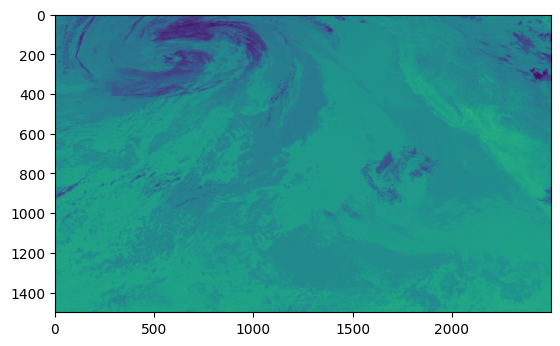

In [6]:
plt.imshow(MCMI["CMI_C07"].values[0]); ## Plot the MCMI data in CONOUS mode

* Now we can predict fire presence using the MCMI data. The ACM data is optional but recommended for better accuracy.

In [7]:
fire_prediction = WD.predict_fire_for_AOI(MCMI_path=MCMI_path,
                                           ACM_path=ACM_path,
                                           AOI_path=AOI_path,
                                           save_raster=False,
                                           output_path=None)

Now working of GOES time stamp: 2024-07-07 10:36
data successfully created for GOES time stamp: 2024-07-07 10:36
Prediction raster created for GOES time stamp: 2024-07-07 10:36
save_raster is False, returning the prediction raster without saving


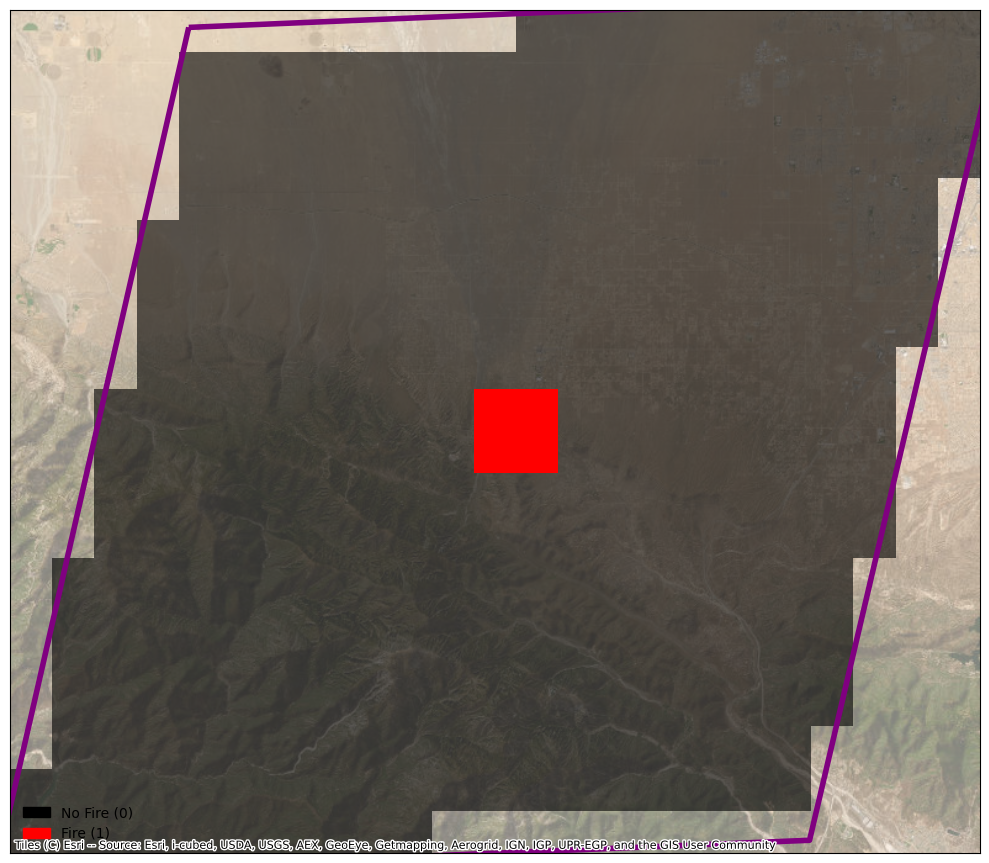

In [8]:
WD.plot_fire_prediction(fire_prediction_raster=fire_prediction, AOI_path=AOI_path)

* Alternatively, we can predict fire withour ACM data

In [9]:
fire_prediction_no_ACM = WD.predict_fire_for_AOI(MCMI_path=MCMI_path,
                                           ACM_path=None,
                                           AOI_path=AOI_path,
                                           save_raster=False,
                                           output_path=None)

Now working of GOES time stamp: 2024-07-07 10:36
data successfully created for GOES time stamp: 2024-07-07 10:36
Prediction raster created for GOES time stamp: 2024-07-07 10:36
save_raster is False, returning the prediction raster without saving


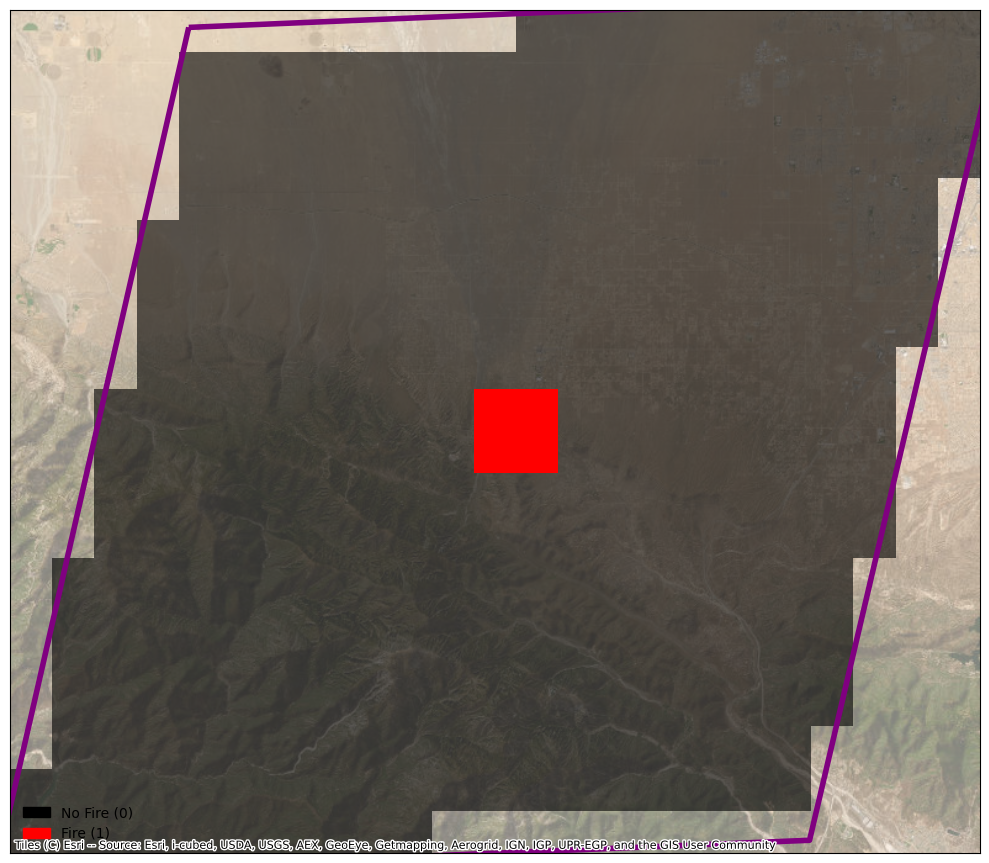

In [10]:
WD.plot_fire_prediction(fire_prediction_raster=fire_prediction_no_ACM, AOI_path=AOI_path)

# We can also save the prediction raster as a GeoTIFF file

In [11]:
fire_prediction = WD.predict_fire_for_AOI(MCMI_path=MCMI_path,
                                           ACM_path=ACM_path,
                                           AOI_path=AOI_path,
                                           save_raster=True,
                                           output_path=r"..\data\GOES_18\fire_prediction_example")

Now working of GOES time stamp: 2024-07-07 10:36
data successfully created for GOES time stamp: 2024-07-07 10:36
Prediction raster created for GOES time stamp: 2024-07-07 10:36
Prediction raster saved to ..\data\GOES_18\fire_prediction_example.tif
